In [6]:
import numpy as np
import pandas as pd
import math

from sklearn.datasets import fetch_openml
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

In [25]:
clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=5)

In [26]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=5)

In [27]:
y_pred = clf.predict(X_test)

In [71]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

def sigmoid(w,x,b):
    return 1/(1+np.exp(-np.dot(x, w.T)+b))

def sig_pred(w,X,b):
    a=[]
    for x in X:
        a.append(sigmoid(w,x,b))
    return a
    
def compute_log_loss(A,B):
    n = len(A)
    res = 0
    for l in zip(A,B):
        res += l[0] * np.log(l[1]) + (1 - l[0]) * np.log(1 - l[1])                   
    loss = (-1 * res) / n
    return loss

In [72]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)
print("the initial train loss is :" ,compute_log_loss(y_train,sig_pred(w,X_train,b))," at W:",w,"  and b :",b)

print("the initial test loss is :" ,compute_log_loss(y_test,sig_pred(w,X_test,b))," at W:",w,"  and b :",b)

the initial train loss is : 0.6931471805595091  at W: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   and b : 0
the initial test loss is : 0.6931471805600756  at W: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   and b : 0


In [81]:
def sgd(X_train, X_test, y_train, y_test, n, w, b, bs=1):
    del_w=np.zeros_like(X_train[0])
    del_b=0
    wl=[]
    bl=[]
    log_loss_train=[]
    log_loss_test=[]
    for epoch in range(n):
        for m in range(1000):
            i = np.random.choice(len(X_train), bs)
            del_w=del_w+X_train[i]*(y_train[i]-sigmoid(w,X_train[i],b))
            del_b=del_b+(y_train[i]-sigmoid(w,X_train[i],b))
        w=(1-(alpha/n))*w+alpha*del_w
        b=b+alpha*del_b
        wl.append(w)
        bl.append(b)
        log_loss_train.append(compute_log_loss(y_train,sig_pred(w,X_train,b)))
        log_loss_test.append(compute_log_loss(y_test,sig_pred(w,X_test,b)))

    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.plot(log_loss_train, label='train_log_loss')
    plt.plot(log_loss_test, label='test_log_loss')
    plt.grid()
    plt.legend()
    plt.title('Log loss vs epoch')
    plt.xlabel('Iterations')
    plt.ylabel('log loss')
    plt.show()
        
    return log_loss_train,log_loss_test,wl,bl

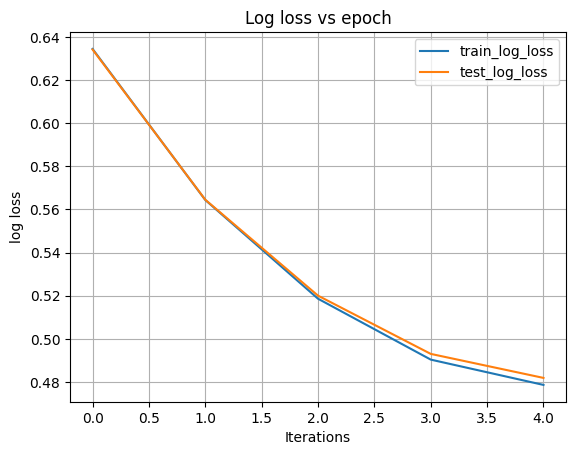

In [82]:
logloss_train,logloss_test,W,B=sgd(X_train, X_test, y_train, y_test, n=5, w=w, b=b)

In [83]:
ind = np.argmin(logloss_train)

print("\nThe test accuracy is : ", accuracy_score(y_test,pred(W[ind],B[ind],X_test)))
print("\nThe train accuracy is : ", accuracy_score(y_train,pred(W[ind],B[ind],X_train)))

print("\nThe test accuracy SKLEARN is : ", accuracy_score(y_test, y_pred) )

/usr/local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)



The test accuracy is :  0.7872666666666667

The train accuracy is :  0.7849428571428572

The test accuracy SKLEARN is :  0.7854
